In [1]:
# importing relevant dependencies

import requests
import re
import matplotlib.pyplot as plt
import requests

In [2]:
# defining function that get content from wikipedia site

def get_content(Wiki_Ozone_layer):

    # Define the Wikipedia API URL
    wiki_link = "https://en.wikipedia.org/w/api.php"

    # Define the query parameters
    query_pars = {"exsectionformat": "wiki", "format": "json", "titles": Wiki_Ozone_layer, "prop": "extracts", "action": "query"}

    # Send a GET request to the Wikipedia API
    get_reqst = requests.get(wiki_link, params=query_pars)

    # Return the JSON response from the API
    return get_reqst.json()

# Get and print the content for the "Ozone_layer" article
data = get_content("Ozone_layer")
print(data)

{'batchcomplete': '', 'warnings': {'extracts': {'*': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats.'}}, 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': '<p class="mw-empty-elt">\n</p>\n<p>The <b>ozone layer</b> or <b>ozone shield</b> is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphe

In [3]:
# defining function that merge content

def merge_contents(data):
    # Extract the article text from the data dictionary
    article_text = data.get("query", {}).get("pages", {}).get(next(iter(data.get("query", {}).get("pages", {})), {}), {}).get("extract", "")

    # Clean the text by removing HTML tags and multiple whitespaces while preserving alphabetical characters and spaces
    clean_text = ' '.join(re.sub(r'<[^>]+>', ' ', article_text).split())

    # Removing non-alphabetic symbols
    clean_text = re.sub(r'[^a-zA-Z\s]+', ' ', clean_text)

    # Removing irrelevant part using regular expressions
    irr_reg = [r'^.*See also\n\n', r'^.*Further reading\n\n', r'\n?\[edit\]\n?', r'^.*External links\n\n', r'^.*Contents\n\n', r'^.*References\n\n']

    for part in irr_reg:
        clean_text = re.sub(part, '', clean_text)

    return clean_text

data = get_content("Ozone_layer")
merge_content = merge_contents(data)
print(merge_content)

The ozone layer or ozone shield is a region of Earth s stratosphere that absorbs most of the Sun s ultraviolet radiation  It contains a high concentration of ozone  O     in relation to other parts of the atmosphere  although still small in relation to other gases in the stratosphere  The ozone layer contains less than   parts per million of ozone  while the average ozone concentration in Earth s atmosphere as a whole is about   parts per million  The ozone layer is mainly found in the lower portion of the stratosphere  from approximately   to   kilometers   to   mi  above Earth  although its thickness varies seasonally and geographically  The ozone layer was discovered in   by French physicists Charles Fabry and Henri Buisson  Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of   K    C  except that there was no radiation below a wavelengt

In [4]:
# defining functions that tokenized content and convert it to lowercase letter

def lower_collection(tokens):
    # Initialize an empty list to store the lowercase tokens
    minuscule_tokens = []

    # Iterate through each token in the input list
    for token in tokens:
        # Convert the token to lowercase and add it to the lowercase_tokens list
        minuscule_tokens.append(token.lower())

    # Return the list of lowercase tokens
    return minuscule_tokens


def tokenize(content):
    # Use the re.findall method to extract all word tokens (\b\w+\b) from the content
    tokens = re.findall(r'\b\w+\b', content)
    return tokens


content = merge_contents(data)
tokens = tokenize(content)
lower_collection = lower_collection(tokens)
print(lower_collection)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'sun', 's', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'to', 'kilometers', 'to', 'mi', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'the', 'ozone', 'layer', 'was', 'discovered', 'in', 'by', 'fre

In [5]:
# defining function that aggregate the number of times a word occur

def count_frequency(tokens):
    # Initialize a dictionary to store number of times a word occur
    prevalence_word = {}

    # Count word recurrence
    for token in tokens:
        prevalence_word[token] = prevalence_word.get(token, 0) + 1

    return prevalence_word

# Count word recurrence and print the result
recurrence = count_frequency(lower_collection)
print(recurrence)


{'the': 212, 'ozone': 95, 'layer': 29, 'or': 6, 'shield': 2, 'is': 39, 'a': 33, 'region': 2, 'of': 106, 'earth': 12, 's': 33, 'stratosphere': 12, 'that': 20, 'absorbs': 4, 'most': 6, 'sun': 5, 'ultraviolet': 13, 'radiation': 16, 'it': 10, 'contains': 2, 'high': 5, 'concentration': 4, 'o': 22, 'in': 71, 'relation': 2, 'to': 63, 'other': 7, 'parts': 5, 'atmosphere': 12, 'although': 5, 'still': 2, 'small': 2, 'gases': 2, 'less': 4, 'than': 4, 'per': 3, 'million': 4, 'while': 4, 'average': 2, 'as': 13, 'whole': 1, 'about': 13, 'mainly': 2, 'found': 3, 'lower': 2, 'portion': 1, 'from': 14, 'approximately': 2, 'kilometers': 2, 'mi': 1, 'above': 4, 'its': 6, 'thickness': 3, 'varies': 3, 'seasonally': 1, 'and': 80, 'geographically': 1, 'was': 16, 'discovered': 2, 'by': 25, 'french': 1, 'physicists': 1, 'charles': 1, 'fabry': 1, 'henri': 1, 'buisson': 1, 'measurements': 1, 'showed': 1, 'sent': 1, 'out': 6, 'surface': 10, 'reaching': 3, 'ground': 3, 'on': 10, 'usually': 1, 'consistent': 1, 'with

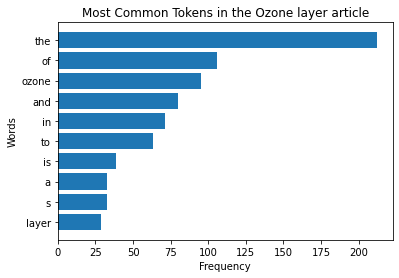

In [6]:
# defining function that count the most occurring word

def print_most_frequent(frequencies, n):
    # Sort frequencies and extract most occurred words
    lead_words = sorted(frequencies, key=frequencies.get, reverse=True)[:n]

    # Plot the most occurred words and their frequencies
    plt.barh(lead_words[::-1], [frequencies[word] for word in lead_words[::-1]])
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Most Common Tokens in the Ozone layer article')
    plt.show()

# Count word frequencies and print the most frequent words
frequencies = count_frequency(lower_collection)
print_most_frequent(frequencies, 10)


In [7]:
# constructing list of stop words

stop_words = [
    "a", "about", "above", "after", "again", "against", "ain't", "all", "am", "an",
    "and", "any", "are", "aren't", "as", "at", "be", "because", "been", "before",
    "also", "below", "between", "both", "but", "by","can", "can't", "cannot", "could",
    "couldn't", "did", "didn't", "do","o", "does", "doesn't", "doing", "don't", "down",
    "during", "each", "few", "for", "from", "further", "had", "hadn't", "has",
    "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her",
    "here", "here's", "hers", "herself","s", "him", "himself", "his", "how", "how's",
    "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into","m", "is", "isn't", "it", "it's",
    "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no",
    "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our",
    "ours", "ourselves", "out", "over", "own", "same","uv", "shan't", "she", "she'd",
    "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that",
    "that's", "the", "their", "theirs", "them", "themselves", "then", "there",
    "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this",
    "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't",
    "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's",
    "when", "when's", "where", "where's", "which", "while","nm", "who", "who's", "whom",
    "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll",
    "you're", "you've", "your", "yours", "yourself", "yourselves"
]


# defining function that remove stop words

def remove_stop_words(tokens, stop_words):
    # Initialize an empty list to store processed tokens
    processed_tokens = []

    # Iterate through tokens and add non-stop words to the processed list
    for token in tokens:
        if token not in stop_words:
            processed_tokens.append(token)

    return processed_tokens

# Remove stop words from the minuscule_tokens collection
filtered_collection = remove_stop_words(lower_collection, stop_words)


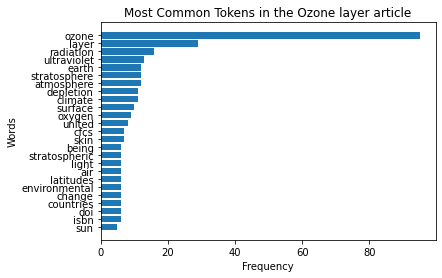

In [8]:
# defining function that print the most occurring word in the filtered_collection 

def print_most_frequent(frequencies, n):
    # Sort word prevalence in descending order
    lead_word_sort = sorted(frequencies, key=frequencies.get, reverse=True)[:n]


    # Extract the lead words and their number of occurrance, and create a horizontal bar chart
    plt.barh(lead_word_sort[::-1], [frequencies[word] for word in lead_word_sort[::-1]])


    # Set y-axis labels and add labels/titles
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Most Common Tokens in the Ozone layer article')

    # Show the chart
    plt.show()

# Count word frequencies for filtered_collection and print the top 25
frequencies = count_frequency(filtered_collection)
print_most_frequent(frequencies, 25)
